In [50]:
audio_path = 'C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/노래/3/볼빨간사춘기-여행.wav'
wav, sr = librosa.load(audio_path)
wav = wav[0:4000000]
wav.shape

(4000000,)

In [46]:
print('length:', wav.shape[0]/float(sr), 'secs')

length: 220.9839455782313 secs


In [1]:
import librosa
import librosa.display
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression#텐서플로우로 바꿀예정
import os
from sklearn import datasets
import pickle
from sklearn.externals import joblib
##### 변수 설정 부분 #####
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 1 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output.wav"
DATA_PATH = "C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/노래"
train_data=[]#train_date 저장할 공강
train_label=[]#train_label 저장할 
test_data=[]#train_date 저장할 공강
test_label=[]#train_label 저장할 
##########################

def load_wave_generator(path): 
       
    batch_waves = []
    labels = []
    # input_width=CHUNK*6 # wow, big!!
    folders = os.listdir(path)
    #while True:
       # print("loaded batch of %d files" % len(files))
    for folder in folders:                 
        files = os.listdir(path+"/"+folder)        
        for wav in files:
            global train_data,train_label#전역변수를 사용하겠다.
            print("Filename :",wav)#.wav 파일이 아니면 continue
            y, sr = librosa.load(path+"/"+folder+"/"+wav)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20).T
            if(len(train_data)==0):
                train_data = mfcc
                train_label = np.full(len(mfcc), int(folder))
            else:
                train_data = np.concatenate((train_data, mfcc), axis = 0)
                train_label = np.concatenate((train_label, np.full(len(mfcc),  int(folder))), axis = 0)
                    #print("mfcc :",mfcc.shape)
                
load_wave_generator(DATA_PATH)


######## 음성 데이터를 읽어와 학습 시키는 부분 ########

print("train_data.shape :", train_data.shape, type(train_data))
print("train_label.shape :", train_label.shape, type(train_label))
#print(mfcc[0])
#print(train_label)
clf = LogisticRegression()
clf.fit(train_data,train_label)
joblib.dump(clf, 'C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/filename.pkl')

Filename : zion.t-양화대교.wav
Filename : 거미-눈꽃.wav
Filename : 규현 - 광화문에서.wav
Filename : 볼빨간사춘기-여행.wav
Filename : 엠씨더맥스-그대가 분다.wav
Filename : 윤종신-좋니.wav
Filename : 이적 - 거짓말 거짓말 거짓말.wav
Filename : 임창정-또 다시 사랑.wav
Filename : 태연 - Rain.wav
Filename : 펀치-밤이 되니까.wav
train_data.shape : (106896, 20) <class 'numpy.ndarray'>
train_label.shape : (106896,) <class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/filename.pkl']

[2 2 6 ... 0 0 0]
0    921
5    300
2    246
4    217
6    209
9     88
1     72
3     64
8     18
7     14
dtype: int64
자이언티와의 유사도 = 0.42857142857142855


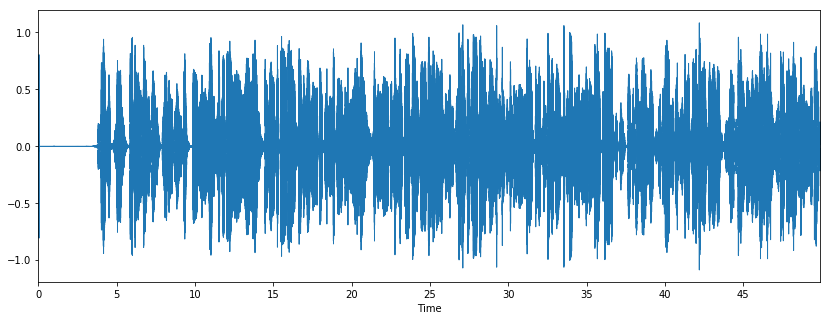

In [4]:
y, sr = librosa.load("C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/zion.t - click me.mp3_vocals (online-audio-converter.com).wav")
#y, sr = librosa.load("./baecheolsu15.wav")
y = y[0:1100000]
plt.figure(figsize=(14,5))
librosa.display.waveplot(y, sr)
#y, sr = librosa.load(WAVE_OUTPUT_FILENAME)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20).T

clf_from_joblib = joblib.load('C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/filename.pkl')
y_test_estimated = clf_from_joblib.predict(mfcc)
print(y_test_estimated)
#test_label = np.full(len(mfcc), 2)
#print(test_label)

# 정답률 구하기
cnt = {}
for i in y_test_estimated :
    cnt[i] = cnt.get(i, 0) + 1
cnt = [(y, x) for x, y in cnt.items()]
cnt.sort(reverse = True)
ac_score = cnt[0][0] / len(y_test_estimated)
#print("유사도 =", ac_score)
print(pd.value_counts(pd.Series(y_test_estimated)))
if(cnt[0][1] == 0):
    print("자이언티와의 유사도 =", ac_score)
#print(cnt[0][1])

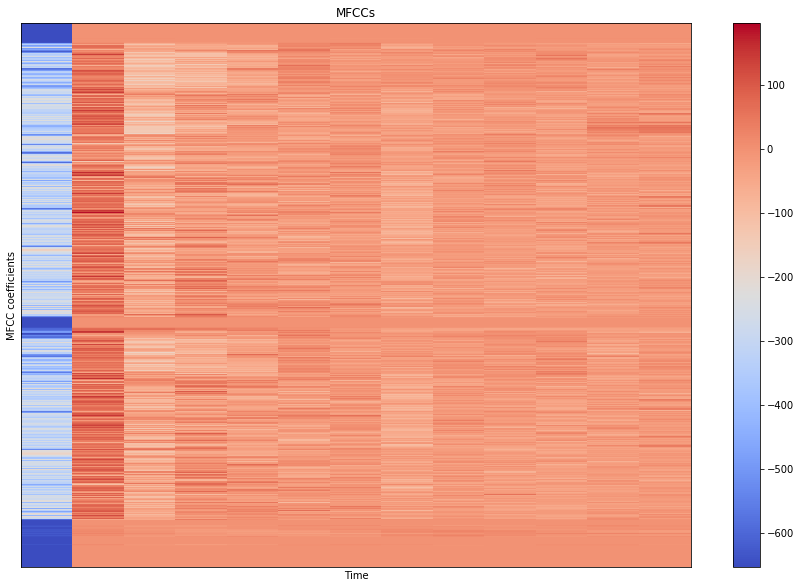

In [14]:
audio_sample, sampling_rate = librosa.load('C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/노래/3/볼빨간사춘기-여행.wav')
mfcc = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T
plt.figure(figsize=(15,10))
librosa.display.specshow(mfcc, sr=sr, hop_length=512)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [20]:
import librosa
import librosa.display
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
import os
from sklearn import datasets
import pickle
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

##### 변수 설정 부분 #####
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 1 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output.wav"
DATA_PATH = "C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/노래"
X_train=[]#train_date 저장할 공강
X_test=[]#train_label 저장할 
Y_train=[]#train_date 저장할 공강
Y_test=[]#train_label 저장할 
tf_classes = 0
##########################

def load_wave_generator(path): 
       
    batch_waves = []
    labels = []
    X_data = []
    Y_label = []
    global X_train, X_test, Y_train, Y_test, tf_classes
    # input_width=CHUNK*6 # wow, big!!
    folders = os.listdir(path)
    #while True:
       # print("loaded batch of %d files" % len(files))
    for folder in folders:                 
        files = os.listdir(path+"/"+folder)        
        for wav in files:
            #print("Filename :",wav)#.wav 파일이 아니면 continue
            y, sr = librosa.load(path+"/"+folder+"/"+wav)
            y = y[0:1100000]
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T
                
            X_data.extend(mfcc)
               # print(len(mfcc))
                
            label = [0 for i in range(len(folders))]
            label[tf_classes] = 1
                
            for i in range(len(mfcc)):
                Y_label.append(label)
                #print(Y_label)
        tf_classes = tf_classes+1
        
    X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_data), np.array(Y_label))
    
load_wave_generator(DATA_PATH)

In [1]:
import librosa
import librosa.display
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
import os
from sklearn import datasets
import pickle
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

##### 변수 설정 부분 #####
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 1 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output.wav"
DATA_PATH = "C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/노래"
X_train=[]#train_date 저장할 공강
X_test=[]#train_label 저장할 
Y_train=[]#train_date 저장할 공강
Y_test=[]#train_label 저장할 
tf_classes = 0
##########################

def load_wave_generator(path): 
       
    batch_waves = []
    labels = []
    X_data = []
    Y_label = []
    global X_train, X_test, Y_train, Y_test, tf_classes
    # input_width=CHUNK*6 # wow, big!!
    folders = os.listdir(path)
    #while True:
       # print("loaded batch of %d files" % len(files))
    for folder in folders:                 
        files = os.listdir(path+"/"+folder)        
        for wav in files:
            #print("Filename :",wav)#.wav 파일이 아니면 continue
            y, sr = librosa.load(path+"/"+folder+"/"+wav)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T
                
            X_data.extend(mfcc)
               # print(len(mfcc))
                
            label = [0 for i in range(len(folders))]
            label[tf_classes] = 1
                
            for i in range(len(mfcc)):
                Y_label.append(label)
                #print(Y_label)
        tf_classes = tf_classes+1
        
    X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_data), np.array(Y_label))
    
load_wave_generator(DATA_PATH)

[array([-304.90793  ,   68.84138  ,   35.12931  ,   -2.6333141,
         22.261528 ,   -2.7919173,  -43.829292 ,   -5.837039 ,
         -9.2331505,  -19.31298  ,  -42.169556 ,  -31.4495   ,
        -30.543526 ], dtype=float32), array([-301.40396  ,   70.13811  ,   29.460361 ,   -6.1526356,
         -1.8524683,   -1.1529889,  -48.325966 ,  -10.845739 ,
         -1.6281941,  -11.796796 ,  -38.50715  ,  -18.065252 ,
        -21.367302 ], dtype=float32), array([-304.429    ,   79.16709  ,   15.937709 ,   -2.3555298,
         -8.610128 ,   -1.2319617,  -54.752304 ,  -21.146492 ,
         -1.5585897,    1.6325234,  -41.200874 ,  -21.463005 ,
        -15.566419 ], dtype=float32), array([-302.9346    ,   72.67926   ,   23.6266    ,    6.477153  ,
          0.57977545,  -15.84029   ,  -50.443176  ,  -28.670837  ,
        -11.932135  ,    0.5384605 ,  -24.699055  ,  -19.353594  ,
        -27.692734  ], dtype=float32), array([-2.9270007e+02,  8.2742569e+01,  2.4527916e+01,  9.3810978e+00,
       

In [14]:
#X_train = X_train.astype("float")
#X_test = X_test.astype("float")

tf.reset_default_graph() 
tf.set_random_seed(777)
learning_rate = 0.001
training_epochs = 100
keep_prob = tf.placeholder(tf.float32)
sd = 1 / np.sqrt(13) # standard deviation 표준편차(표본표준편차라 1/root(n))

#mfcc의 기본은 20
# 20ms일 때216은 각 mfcc feature의 열이 216
X = tf.placeholder(tf.float32, [None, 13])
# 
Y = tf.placeholder(tf.float32, [None, tf_classes])

# W = tf.Variable(tf.random_normal([216, 200]))
# b = tf.Variable(tf.random_normal([200]))

#1차 히든레이어
W1 = tf.get_variable("w1",
    #tf.random_normal([216, 180], mean=0, stddev=sd),
        shape=[13, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256], mean=0, stddev=sd), name="b1")
L1 = tf.nn.relu(tf.matmul(X, W1) + b1) # 1차 히든레이어는 'Relu' 함수를 쓴다.
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

# 2차 히든 레이어
W2 = tf.get_variable("w2",
    #tf.random_normal([180, 150], mean=0, stddev=sd),
         shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256], mean=0, stddev=sd), name="b2")
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2) # 2차 히든레이어는 'Relu' 함수를 쓴다.
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

# 3차 히든 레이어
W3 = tf.get_variable("w3",
    #tf.random_normal([150, 100], mean=0, stddev=sd),
            shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256], mean=0, stddev=sd), name="b3")
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3) # 3차 히든레이어는 'Relu' 함수를 쓴다.
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

# 4차 히든 레이어
W4 = tf.get_variable("w4",
    #tf.random_normal([100, 50], mean=0, stddev=sd),
             shape=[256, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([128], mean=0, stddev=sd), name="b4")
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4) # 4차 히든레이어는 'Relu' 함수를 쓴다.
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

# 5차 히든 레이어
W5 = tf.get_variable("w5",
    #tf.random_normal([100, 50], mean=0, stddev=sd),
             shape=[128, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([128], mean=0, stddev=sd), name="b5")
L5 = tf.nn.relu(tf.matmul(L4, W5) + b5) # 5차 히든레이어는 'Relu' 함수를 쓴다.
L5 = tf.nn.dropout(L5, keep_prob = keep_prob)

# 6차 히든 레이어
W6 = tf.get_variable("w6",
    #tf.random_normal([100, 50], mean=0, stddev=sd),
             shape=[128, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([128], mean=0, stddev=sd), name="b6")
L6 = tf.nn.relu(tf.matmul(L5, W6) + b6) # 6차 히든레이어는 'Relu' 함수를 쓴다.
L6 = tf.nn.dropout(L6, keep_prob = keep_prob)

# 7차 히든 레이어
W7 = tf.get_variable("w7",
    #tf.random_normal([100, 50], mean=0, stddev=sd),
             shape=[128, 128],
                     initializer=tf.contrib.layers.xavier_initializer())
b7 = tf.Variable(tf.random_normal([128], mean=0, stddev=sd), name="b7")
L7 = tf.nn.relu(tf.matmul(L6, W7) + b7) # 7차 히든레이어는 'Relu' 함수를 쓴다.
L7 = tf.nn.dropout(L7, keep_prob = keep_prob)

# 최종 레이어
W8 = tf.get_variable("w8", 
    #tf.random_normal([50, tf_classes], mean=0, stddev=sd),
            shape=[128, tf_classes],
                     initializer=tf.contrib.layers.xavier_initializer())
b8 = tf.Variable(tf.random_normal([tf_classes], mean=0, stddev=sd), name="b8")
hypothesis = tf.matmul(L7, W8) + b8



#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))


batch_size=1
x_len = len(X_train)
#짝수
#if(x_len%2==0):
    #batch_size = 2
#elif(x_len%3==0):
    #batch_size = 3
#else:
    #batch_size = 1

split_X = np.split(X_train,batch_size)
split_Y = np.split(Y_train,batch_size)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(batch_size):
        batch_xs = split_X[i]
        batch_ys = split_Y[i]
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / batch_size
        #if(epoch%10==0):
    print('Epoch:', '%04d' % (epoch), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={X: X_test, Y:Y_test, keep_prob:1}))

print('Learning Finished!')

Epoch: 0000 cost = 24.917512894
Epoch: 0001 cost = 14.097563744
Epoch: 0002 cost = 9.280301094
Epoch: 0003 cost = 6.849123001
Epoch: 0004 cost = 5.450392246
Epoch: 0005 cost = 4.492220879
Epoch: 0006 cost = 3.854677200
Epoch: 0007 cost = 3.404118299
Epoch: 0008 cost = 3.089886904
Epoch: 0009 cost = 2.892763138
Epoch: 0010 cost = 2.760335684
Epoch: 0011 cost = 2.637482405
Epoch: 0012 cost = 2.578365803
Epoch: 0013 cost = 2.528095007
Epoch: 0014 cost = 2.494570971
Epoch: 0015 cost = 2.464237213
Epoch: 0016 cost = 2.443682432
Epoch: 0017 cost = 2.426394701
Epoch: 0018 cost = 2.411150217
Epoch: 0019 cost = 2.408535957
Epoch: 0020 cost = 2.397887707
Epoch: 0021 cost = 2.382339954
Epoch: 0022 cost = 2.382025719
Epoch: 0023 cost = 2.378518105
Epoch: 0024 cost = 2.372991800
Epoch: 0025 cost = 2.367124081
Epoch: 0026 cost = 2.365213633
Epoch: 0027 cost = 2.361276627
Epoch: 0028 cost = 2.358158827
Epoch: 0029 cost = 2.356024265
Epoch: 0030 cost = 2.354354620
Epoch: 0031 cost = 2.351875067
Epoch:

In [18]:
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(batch_size):
        batch_xs = split_X[i]
        batch_ys = split_Y[i]
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / batch_size
        #if(epoch%10==0):
    print('Epoch:', '%04d' % (epoch), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={X: X_test, Y:Y_test, keep_prob:1}))

print('Learning Finished!')

Epoch: 0000 cost = 2.060583830
Epoch: 0001 cost = 2.061105490
Epoch: 0002 cost = 2.061015844
Epoch: 0003 cost = 2.052812576
Epoch: 0004 cost = 2.049436808
Epoch: 0005 cost = 2.055322886
Epoch: 0006 cost = 2.048960447
Epoch: 0007 cost = 2.051776171
Epoch: 0008 cost = 2.046707869
Epoch: 0009 cost = 2.042425156
Epoch: 0010 cost = 2.046514034
Epoch: 0011 cost = 2.039091587
Epoch: 0012 cost = 2.042657614
Epoch: 0013 cost = 2.042365074
Epoch: 0014 cost = 2.030121565
Epoch: 0015 cost = 2.036126852
Epoch: 0016 cost = 2.040617466
Epoch: 0017 cost = 2.034393787
Epoch: 0018 cost = 2.033093452
Epoch: 0019 cost = 2.029369354
Epoch: 0020 cost = 2.028339148
Epoch: 0021 cost = 2.029883623
Epoch: 0022 cost = 2.024713039
Epoch: 0023 cost = 2.026278734
Epoch: 0024 cost = 2.021152735
Epoch: 0025 cost = 2.019386292
Epoch: 0026 cost = 2.021123648
Epoch: 0027 cost = 2.017253399
Epoch: 0028 cost = 2.021450996
Epoch: 0029 cost = 2.019070864
Epoch: 0030 cost = 2.012759924
Epoch: 0031 cost = 2.012909889
Epoch: 0

In [19]:
y, sr = librosa.load("C:/Users/lee/Desktop/인생자료들/3학년 1학기/지능형시스템/zion.t - click me.mp3_vocals (online-audio-converter.com).wav")

X_test = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

label = [0 for i in range(10)]
y_test_estimated = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: X_test, keep_prob:1})
cnt = {}
for i in y_test_estimated :
    cnt[i] = cnt.get(i, 0) + 1
cnt = [(y, x) for x, y in cnt.items()]
cnt.sort(reverse = True)
#ac_score = cnt[0][0] / len(y_test_estimated)
label[cnt[0][1]] = 1
Y_test = []
for i in range(len(X_test)) :
    Y_test.append(label)

print(np.shape(X_test))
print(np.shape(Y_test))


#correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#print("Accuracy: ", sess.run(accuracy, feed_dict={X: X_test, Y:Y_test, keep_prob:1}))
#print("Label :",sess.run(tf.argmax(Y_test,1)))

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("predict")
print(pd.value_counts(pd.Series(y_test_estimated)))
if(cnt[0][1] == 0):
    print("자이언티와의 유사도 =", sess.run(accuracy, feed_dict={X: X_test, Y:Y_test, keep_prob:1}))
#print("Accuracy: ", sess.run(accuracy, feed_dict={X: X_test, Y:Y_test, keep_prob:1}))

(7846, 13)
(7846, 10)
predict
0    3272
8    1613
7    1186
3     735
9     695
1     193
6     113
5      25
4      14
dtype: int64
자이언티와의 유사도 = 0.41702777


In [7]:
#X_train = X_train.astype("float")
#X_test = X_test.astype("float")

tf.reset_default_graph() 
tf.set_random_seed(777)
learning_rate = 0.001
training_epochs = 100
keep_prob = tf.placeholder(tf.float32)
sd = 1 / np.sqrt(13) # standard deviation 표준편차(표본표준편차라 1/root(n))

#mfcc의 기본은 20
# 20ms일 때216은 각 mfcc feature의 열이 216
X = tf.placeholder(tf.float32, [None, 13])
# 
Y = tf.placeholder(tf.float32, [None, tf_classes])

# W = tf.Variable(tf.random_normal([216, 200]))
# b = tf.Variable(tf.random_normal([200]))

#1차 히든레이어
W1 = tf.get_variable("w1",
    #tf.random_normal([216, 180], mean=0, stddev=sd),
        shape=[13, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256], mean=0, stddev=sd), name="b1")
L1 = tf.nn.relu(tf.matmul(X, W1) + b1) # 1차 히든레이어는 'Relu' 함수를 쓴다.
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

# 최종 레이어
W2 = tf.get_variable("w2", 
    #tf.random_normal([50, tf_classes], mean=0, stddev=sd),
            shape=[256, tf_classes],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([tf_classes], mean=0, stddev=sd), name="b2")
hypothesis = tf.matmul(L1, W2) + b2



#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))

#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))


batch_size=3
x_len = len(X_train)
#짝수
#if(x_len%2==0):
    #batch_size = 2
#elif(x_len%3==0):
    #batch_size = 3
#else:
    #batch_size = 1

split_X = np.split(X_train,batch_size)
split_Y = np.split(Y_train,batch_size)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(batch_size):
        batch_xs = split_X[i]
        batch_ys = split_Y[i]
        feed_dict = {X:batch_xs, Y:batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / batch_size
        #if(epoch%10==0):
    print('Epoch:', '%04d' % (epoch), 'cost =', '{:.9f}'.format(avg_cost))

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={X: X_test, Y:Y_test, keep_prob:1}))

print('Learning Finished!')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.math.argmax` instead
Epoch: 0000 cost = 108.886644999
Epoch: 0001 cost = 77.351084391
Epoch: 0002 cost = 58.810564677
Epoch: 0003 cost = 53.126049042
Epoch: 0004 cost = 51.103708903
Epoch: 0005 cost = 47.841421763
Epoch: 0006 cost = 44.825500488
Epoch: 0007 cost = 43.576932271
Epoch: 0008 cost = 41.408173879
Epoch: 0009 cost = 38.755391439
Epoch: 0010 cost = 36.771635691
Epoch: 0011 cost = 35.464659373
Epoch: 0012 cost = 34.504521688
Epoch: 0013 cost = 33.411294301
Epoch: 0014 cost = 32.279731750
Epoch: 0015 cost = 30.996782939
Epoch: 0016 cost = 29.923553467
Epoch: 0017 cost = 29.014163971
Epoch: 0018 cost = 28.247219721
Epoch: 0019 cost = 27.3579463